<a href="https://colab.research.google.com/github/Dntfreitas/inteligencia-artificial/blob/main/Pr%C3%A1tica/Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set()

# **Passo 1**: Obter dados

Neste passo, vamos obter o conjunto de dados, e analisar as _features_. O objectivo é usar as características (i.e., _features_) das casas para predizer o valor médio das casas (expresso em centenas de milhares de dólares).



**Features:**
  - MedInc        median income in block
  - HouseAge      median house age in block
  - AveRooms      average number of rooms
  - AveBedrms     average number of bedrooms<
  - Population    block population
  - AveOccup      average house occupancy
  - Latitude      house block latitude
  - Longitude     house block longitude

In [2]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [5]:
X.describe() # we can use to detect possible outliers

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


# **Passo 2 e 3**: Pré-processamento dos dados e preparação dos dados

Vamos fazer uma análise exploratória dos dados para percebermos as _features_ de interesse.

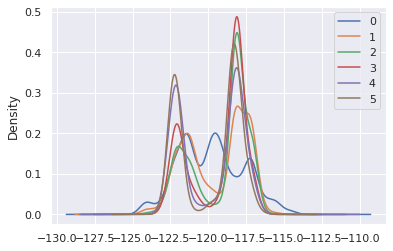

In [6]:
q = 6
feature = 'Longitude' #@param ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

dis_value = pd.qcut(y, q, labels=False)
df = pd.DataFrame([X[feature], dis_value]).T
ax = df[df['MedHouseVal']==0].plot.density(x='MedHouseVal')
for i in range(1, q):
  df[df['MedHouseVal']==i].plot.density(x='MedHouseVal', ax=ax, label='a')

ax.legend(list(range(q)));
plt.show()

In [7]:
# Seleção de features
feature_to_use = ['MedInc', 'HouseAge', 'Latitude', 'Longitude']

In [8]:
# Seleção do conjunto de dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X[feature_to_use], y, test_size=.3)

In [9]:
# Feature normalization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Passo 4**: Inicialização do modelo

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(X_train.shape[-1])))
model.add(tf.keras.layers.Dense(50, activation='sigmoid'))
model.add(tf.keras.layers.Dense(50, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

Compilar o modelo

In [11]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_percentage_error'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


# **Passo 5**: Treino do modelo

In [13]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.1)

In [14]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, callbacks=[callback], validation_split=0.3)

Epoch 1/50
159/159 [==============================] - 2s 5ms/step - loss: 1.3717 - mean_squared_error: 1.3717 - mean_absolute_percentage_error: 61.0762 - val_loss: 1.2738 - val_mean_squared_error: 1.2738 - val_mean_absolute_percentage_error: 66.4669
Epoch 2/50
159/159 [==============================] - 0s 3ms/step - loss: 1.2223 - mean_squared_error: 1.2223 - mean_absolute_percentage_error: 59.2350 - val_loss: 1.1635 - val_mean_squared_error: 1.1635 - val_mean_absolute_percentage_error: 60.4613
Epoch 3/50
159/159 [==============================] - 0s 3ms/step - loss: 1.1116 - mean_squared_error: 1.1116 - mean_absolute_percentage_error: 56.2503 - val_loss: 1.0717 - val_mean_squared_error: 1.0717 - val_mean_absolute_percentage_error: 47.5925
Epoch 4/50
159/159 [==============================] - 0s 3ms/step - loss: 0.9650 - mean_squared_error: 0.9650 - mean_absolute_percentage_error: 51.6229 - val_loss: 0.9790 - val_mean_squared_error: 0.9790 - val_mean_absolute_percentage_error: 64.7601


Curva da função de perda de treino

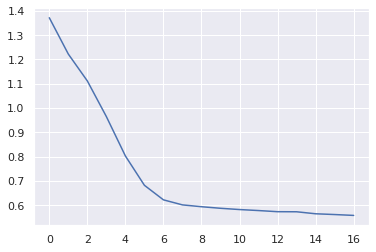

In [15]:
plt.plot(history.history['loss'])

Curva da função de perda de validação

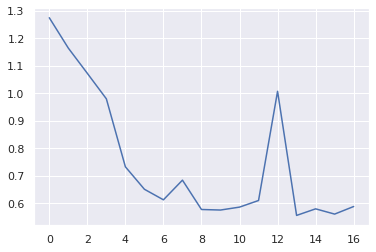

In [16]:
plt.plot(history.history['val_loss'])

# **Passo 6**: Avaliação do modelo

In [17]:
train_loss = model.evaluate(X_train, y_train)

452/452 [==============================] - 1s 2ms/step - loss: 0.5951 - mean_squared_error: 0.5951 - mean_absolute_percentage_error: 28.5812


In [18]:
test_loss = model.evaluate(X_test, y_test)

194/194 [==============================] - 0s 2ms/step - loss: 0.6035 - mean_squared_error: 0.6035 - mean_absolute_percentage_error: 28.5296


In [19]:
y_pred_train = model.predict(X_train)  # cálculo das saídas

y_pred_test_prob = model.predict(X_test)  # cálculo das saídas

194/194 [==============================] - 0s 2ms/step
